In [1]:
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np                         # Good module for matrix and matrix operation
import matplotlib.pyplot as plt            # Module to produce figure
import matplotlib.colors as colors
import os                                  # Used to convert png to other format
from matplotlib.path import Path
import matplotlib.patches as patches
import netCDF4
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)
import numpy as np

In [2]:
def lambert_map(extent=(-82, -75, 41, 46), cent_lon =-80,figsize=(14, 12), fig = None, ax = None):

    proj = ccrs.LambertConformal(central_longitude=cent_lon, central_latitude=35,
                                 standard_parallels=[35])
    if ax == None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(1, 1, 1, projection=proj)

    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',  name='admin_1_states_provinces_lines',
        scale='50m', facecolor='none')
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='None',
                                            #edgecolor='face',
                                            facecolor='0.9')
    lakes_50m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='None',
                                            facecolor=[(0.59375 , 0.71484375, 0.8828125)])
    lakes_50m_edge= cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='k',
                                            facecolor='None',lw=0.4)
    ax.add_feature(land_50m);
    #ax.add_feature(lakes_50m, zorder=3); 
    ax.add_feature(lakes_50m_edge, zorder=10,lw=0.4);
    #ax.add_feature(cfeature.LAKES, edgecolor='white', zorder=10);
    ax.add_feature(cfeature.BORDERS, zorder=10,edgecolor='dimgray');
    #ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
    #ax.coastlines('50m', zorder=15, color='k',lw=0.5)
    ax.coastlines('50m', zorder=15, color='k',linewidths=0.4)
    # Set plot bounds
    ax.set_extent(extent)
    return fig, ax

In [3]:
perc = 'p99p0'

In [4]:
Topo  = netCDF4.Dataset('Geopotential_orography.nc','r')
elevation = Topo.variables['z'][0,:,:]

Track=netCDF4.Dataset('TPExtremes_'+perc+'_duration_exceedance_distribution_Halloween_ERA5.nc','r')

lat0 = Track.variables['latitude'][:]
lon0 = Track.variables['longitude'][:]

exDuration  = Track.variables['extreme_duration_all'][:,:]
exIntensity  = Track.variables['extreme_exceedance_all'][:,:]

# total timesteps : 7305x24 (during 2001-2020) 


In [5]:
Track2=netCDF4.Dataset('TPExtremes_'+perc+'_duration_exceedance_distribution_Halloween_IMERG.nc','r')

lat02 = Track2.variables['latitude'][:]
lon02 = Track2.variables['longitude'][:]


exDuration2  = Track2.variables['extreme_duration_all'][:,:]
exIntensity2  = Track2.variables['extreme_exceedance_all'][:,:]

# total timesteps : 7305x24 (during 2001-2020) 


In [7]:
Track3=netCDF4.Dataset('WSExtremes_'+perc+'_duration_exceedance_distribution_Halloween_ERA5.nc','r')

exDuration_ws  = Track3.variables['extreme_duration_all'][:,:]
exIntensity_ws  = Track3.variables['extreme_exceedance_all'][:,:]

In [8]:
lon2, lat2 = np.meshgrid(lon02, lat02)
print (lat2.shape[0])
print (lon2.shape[1])


lon, lat = np.meshgrid(lon0, lat0)
print (lat.shape[0])
print (lon.shape[1])

nx= lon.shape[0]
ny= lon.shape[1]

mask=np.ones((nx,ny),dtype=bool)
maskzero=np.ones((nx,ny))
for i in np.arange(nx):
    for j in np.arange (ny):
        if (lat[i,j]<=60 and lat[i,j]>=40 and lon[i,j]>=255 and lon[i,j]<=300):
             mask[i,j] = False
             maskzero[i,j] = 1.

351
1301
201
521


In [9]:
data = open('HalloweenStorm_track.txt','r')

point=[]
date=[]
latetc=[]
lonetc=[]

for i, line in enumerate(data):
    words=line.split()
    
    point0 =int(words[2])
    date0  =words[3]
    latetc0   =float(words[4])
    lonetc0   =float(words[5])
    
    point.append(point0)
    date.append(date0)
    latetc.append(latetc0)
    lonetc.append(lonetc0)


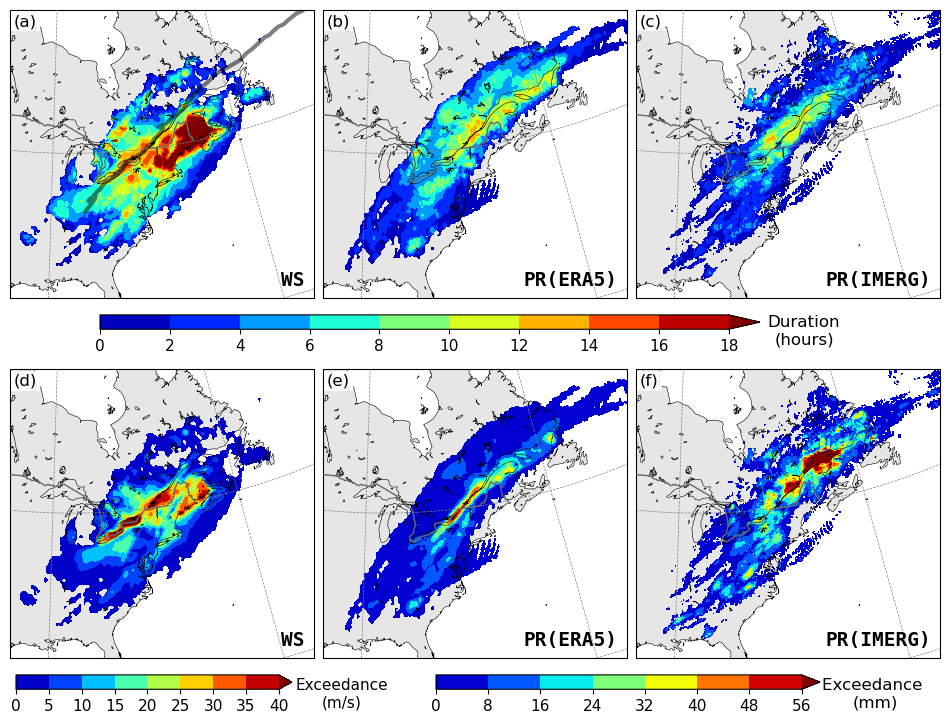

In [10]:
mono_font = {'fontname':'monospace'}
sans_font = {'fontname':'sans-serif'}

fig = plt.figure(figsize=(12,9))
proj = ccrs.LambertConformal(central_longitude=-87, central_latitude=35,
                                 standard_parallels=[35])
levels=np.arange(0,19,2)



ax = fig.add_subplot(2, 3, 1, projection=proj)
fig, ax = lambert_map(extent=(-95, -55, 28, 58), fig=fig,
            cent_lon=-87, ax=ax)

cf = ax.contourf(lon, lat, exDuration_ws[:,:], levels,
                   transform=ccrs.PlateCarree(), zorder=5,
                   cmap=plt.cm.get_cmap('jet'), extend='max')

gl= ax.gridlines(draw_labels=True, x_inline=False, y_inline=False,
                 color='gray', linestyle='dashed', linewidth=0.5, zorder=21)

etctrack=plt.plot(lonetc,latetc,c='k',lw=3, alpha=0.5, transform=ccrs.PlateCarree(),zorder=20)

gl.top_labels=False 
gl.bottom_labels=False
gl.left_labels=False
gl.right_labels=False

gl.ylocator = LatitudeLocator()
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()

gl.xlocator = mticker.FixedLocator([-150,-120,-90,-60,-30])
gl.ylocator = mticker.FixedLocator([25,45,65,85])

#cbaxes = fig.add_axes([0.1, 0.14, 0.25, 0.04])  
#cb = plt.colorbar(cf, cax = cbaxes, orientation='horizontal') #, ticks=np.arange(0,3,1))
#cb.ax.tick_params(labelsize=11)
#cb.ax.set_title('(hours)', x=1.15, y=-1.7, fontsize=11)
ax.text(0.97,0.03,'WS',horizontalalignment='right',verticalalignment='bottom', 
            transform=ax.transAxes,fontsize=14,zorder=28, **mono_font, weight='bold')
ax.text(0.013,0.986,'(a)',bbox={'facecolor':'white','edgecolor':'None','alpha':0.9,'pad':2.0},
        horizontalalignment='left',verticalalignment='top', 
            transform=ax.transAxes,fontsize=12,zorder=28, **sans_font)
#---------------------

ax = fig.add_subplot(2, 3, 2, projection=proj)
fig, ax = lambert_map(extent=(-95, -55, 28, 58), fig=fig,
            cent_lon=-87, ax=ax)

cf = ax.contourf(lon, lat, exDuration[:,:], levels,
                   transform=ccrs.PlateCarree(), zorder=6,
                   cmap=plt.cm.get_cmap('jet'), extend='max')

gl= ax.gridlines(draw_labels=True, x_inline=False, y_inline=False,
                 color='gray', linestyle='dashed', linewidth=0.5, zorder=21)

gl.top_labels=False 
gl.bottom_labels=False
gl.left_labels=False
gl.right_labels=False

gl.ylocator = LatitudeLocator()
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()

gl.xlocator = mticker.FixedLocator([-150,-120,-90,-60,-30])
gl.ylocator = mticker.FixedLocator([25,45,65,85])

cbaxes = fig.add_axes([0.2, 0.5, 0.55, 0.016])  
cb = plt.colorbar(cf, cax = cbaxes, orientation='horizontal') #, ticks=np.arange(0,3,1))
cb.ax.tick_params(labelsize=11)
cb.ax.set_title('Duration\n(hours)', x=1.12, y=-1.6, fontsize=12)

ax.text(0.97,0.03,'PR(ERA5)',horizontalalignment='right',verticalalignment='bottom', 
            transform=ax.transAxes,fontsize=14,zorder=28, **mono_font, weight='bold')
ax.text(0.013,0.986,'(b)',bbox={'facecolor':'white','edgecolor':'None','alpha':0.9,'pad':2.0},
        horizontalalignment='left',verticalalignment='top', 
            transform=ax.transAxes,fontsize=12,zorder=28, **sans_font)
#------------------

ax = fig.add_subplot(2, 3, 3, projection=proj)
fig, ax = lambert_map(extent=(-95, -55, 28, 58), fig=fig,
            cent_lon=-87, ax=ax)

cf = ax.contourf(lon2, lat2, exDuration2[:,:], levels,
                   transform=ccrs.PlateCarree(), zorder=6,
                   cmap=plt.cm.get_cmap('jet'), extend='max')

gl= ax.gridlines(draw_labels=True, x_inline=False, y_inline=False,
                 color='gray', linestyle='dashed', linewidth=0.5, zorder=21)


gl.top_labels=False 
gl.bottom_labels=False
gl.left_labels=False
gl.right_labels=False

gl.ylocator = LatitudeLocator()
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()

gl.xlocator = mticker.FixedLocator([-150,-120,-90,-60,-30])
gl.ylocator = mticker.FixedLocator([25,45,65,85])

ax.text(0.97,0.03,'PR(IMERG)',horizontalalignment='right',verticalalignment='bottom', 
            transform=ax.transAxes,fontsize=14,zorder=28, **mono_font, weight='bold')
ax.text(0.013,0.986,'(c)',bbox={'facecolor':'white','edgecolor':'None','alpha':0.9,'pad':2.0},
        horizontalalignment='left',verticalalignment='top', 
            transform=ax.transAxes,fontsize=12,zorder=28, **sans_font)

#------------------------------------------------------------------------------------------
levels=np.arange(0,45,5)
levels2=np.arange(0,64,8)



ax = fig.add_subplot(2, 3, 4, projection=proj)
fig, ax = lambert_map(extent=(-95, -55, 28, 58), fig=fig,
            cent_lon=-87, ax=ax)

cf = ax.contourf(lon, lat, exIntensity_ws[:,:], levels,
                   transform=ccrs.PlateCarree(), zorder=5,
                   cmap=plt.cm.get_cmap('jet'), extend='max')

gl= ax.gridlines(draw_labels=True, x_inline=False, y_inline=False,
                 color='gray', linestyle='dashed', linewidth=0.5, zorder=21)


gl.top_labels=False 
gl.bottom_labels=False
gl.left_labels=False
gl.right_labels=False

gl.ylocator = LatitudeLocator()
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()

gl.xlocator = mticker.FixedLocator([-150,-120,-90,-60,-30])
gl.ylocator = mticker.FixedLocator([25,45,65,85])

cbaxes = fig.add_axes([0.13, 0.1, 0.23, 0.016])  
cb = plt.colorbar(cf, cax = cbaxes, orientation='horizontal') #, ticks=np.arange(0,3,1))
cb.ax.tick_params(labelsize=11)
cb.ax.set_title('Exceedance\n(m/s)', x=1.24, y=-1.8, fontsize=11)
ax.text(0.97,0.03,'WS',horizontalalignment='right',verticalalignment='bottom', 
            transform=ax.transAxes,fontsize=14,zorder=28, **mono_font, weight='bold')
ax.text(0.013,0.986,'(d)',bbox={'facecolor':'white','edgecolor':'None','alpha':0.9,'pad':2.0},
        horizontalalignment='left',verticalalignment='top', 
            transform=ax.transAxes,fontsize=12,zorder=28, **sans_font)
#---------------------

ax = fig.add_subplot(2, 3, 5, projection=proj)
fig, ax = lambert_map(extent=(-95, -55, 28, 58), fig=fig,
            cent_lon=-87, ax=ax)

cf = ax.contourf(lon, lat, exIntensity[:,:], levels2,
                   transform=ccrs.PlateCarree(), zorder=6,
                   cmap=plt.cm.get_cmap('jet'), extend='max')

gl= ax.gridlines(draw_labels=True, x_inline=False, y_inline=False,
                 color='gray', linestyle='dashed', linewidth=0.5, zorder=21)

gl.top_labels=False 
gl.bottom_labels=False
gl.left_labels=False
gl.right_labels=False

gl.ylocator = LatitudeLocator()
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()

gl.xlocator = mticker.FixedLocator([-150,-120,-90,-60,-30])
gl.ylocator = mticker.FixedLocator([25,45,65,85])

cbaxes = fig.add_axes([0.48, 0.1, 0.32, 0.016])  
cb = plt.colorbar(cf, cax = cbaxes, orientation='horizontal') #, ticks=np.arange(0,3,1))
cb.ax.tick_params(labelsize=11)
cb.ax.set_title('Exceedance \n(mm)', x=1.2, y=-1.8, fontsize=12)

ax.text(0.97,0.03,'PR(ERA5)',horizontalalignment='right',verticalalignment='bottom', 
            transform=ax.transAxes,fontsize=14,zorder=28, **mono_font, weight='bold')
ax.text(0.013,0.986,'(e)',bbox={'facecolor':'white','edgecolor':'None','alpha':0.9,'pad':2.0},
        horizontalalignment='left',verticalalignment='top', 
            transform=ax.transAxes,fontsize=12,zorder=28, **sans_font)
#------------------

ax = fig.add_subplot(2, 3, 6, projection=proj)
fig, ax = lambert_map(extent=(-95, -55, 28, 58), fig=fig,
            cent_lon=-87, ax=ax)


cf = ax.contourf(lon2, lat2, exIntensity2[:,:], levels2,
                   transform=ccrs.PlateCarree(), zorder=6,
                   cmap=plt.cm.get_cmap('jet'), extend='max')

gl= ax.gridlines(draw_labels=True, x_inline=False, y_inline=False,
                 color='gray', linestyle='dashed', linewidth=0.5, zorder=21)

gl.top_labels=False 
gl.bottom_labels=False
gl.left_labels=False
gl.right_labels=False

gl.ylocator = LatitudeLocator()
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()

gl.xlocator = mticker.FixedLocator([-150,-120,-90,-60,-30])
gl.ylocator = mticker.FixedLocator([25,45,65,85])

ax.text(0.97,0.03,'PR(IMERG)',horizontalalignment='right',verticalalignment='bottom', 
            transform=ax.transAxes,fontsize=14,zorder=28, **mono_font, weight='bold')
ax.text(0.013,0.986,'(f)',bbox={'facecolor':'white','edgecolor':'None','alpha':0.9,'pad':2.0},
        horizontalalignment='left',verticalalignment='top', 
            transform=ax.transAxes,fontsize=12,zorder=28, **sans_font)
#------------------------------------------------------------------------------------------
plt.subplots_adjust(wspace=0.03, hspace=0.08)
plt.savefig('Fig8_exDuration_n_exceedance_TP_WS'+perc+'_Halloween_ERA5_IMERG_jet', bbox_inches='tight', dpi=200)
plt.show()